## Многовариантное тестирование

### План семинара

1. Бизнес-постановка задачи мультивариантного развития.
2. Выбор стратегии при проведении мультивариантного тестирования.
3. Математическая постановка задачи мультивариантного тестирования.
4. Решение задачи для дискретных распределений.
5. Сведение задачи мультивариантного тестирования от Бернуллиевских случайных величин к нормальным случайным величинам.
6. Другие критерии для проведения многовариантного тестирования.

### 1. Бизнес-постановка задачи

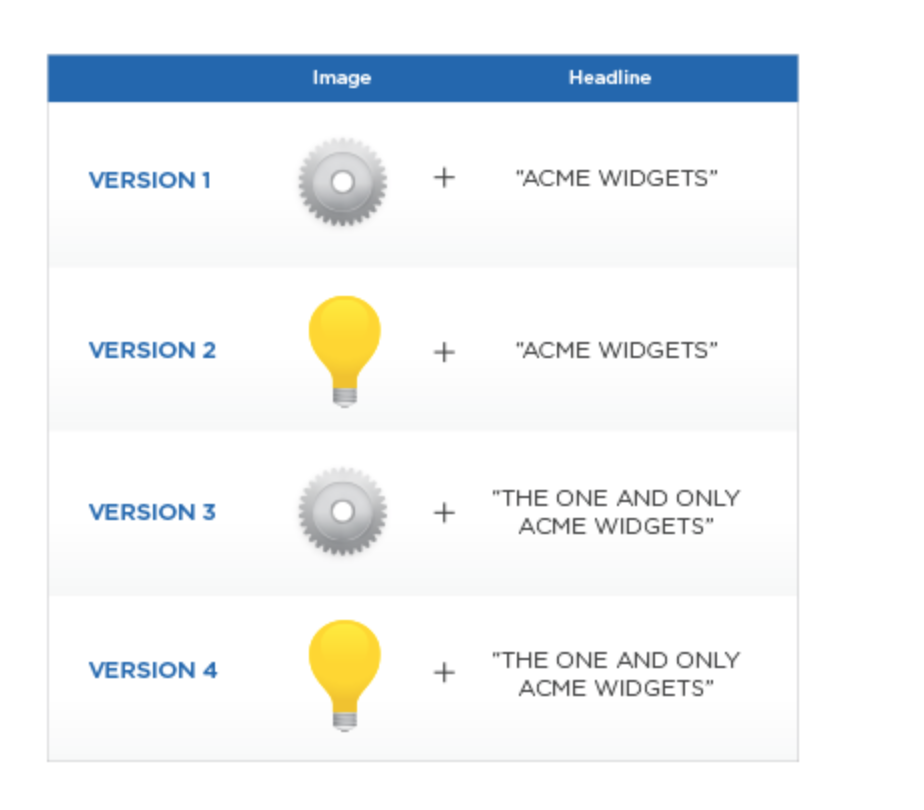

В отличие от A/B тестирования, где проверяется, что метрика статистически значимо отличается только относительно одного улучшения, в многовариантном тестировании могут рассматриваться сразу несколько вариантов модификаций одного и того же критерия.

Представим, что необходимо протестировать сразу несколько новых факторов: 
* новая форма оплаты товара;
* новая вид корзины;
* новая форма для промоакций

причем для каждого варианта есть два новых способа, как это сделать (к примеру, форму оплаты товара можно сделать в синих тонах и в красных тонах).


Сколько вариантов оформления страницы может быть?

## 2. Стратегии проведения многовариантного тестирования

### 1. Полное тестирование

Первый вариант многовариатного тестирования - это перебор всех вариантов. Для этого необходимо подготовить очень много траффика и данных, чтобы проверить экспоненциальное число вариантов. Сильно затратный вариант - проходит только для проверки малого числа экспериментов.

### 2. Частичное тестирование

Полный перебор вариантов - не очень эффективный вариант. Поэтому можно откинуть явно варианты, которые явно будут плохими с точки зрения пользовательского опыта:

Примеры таких вариантов:
* Две кнопки "Купить"
* Перебор "красной гаммы" - делать только одну красную кнопку по всем вариантам

Следующее изображение показывает возможную выборку вариантов для тестирования (-1 - новый вариант, +1 - старый)

Для этого строятся векторы из 1 и -1, которые ортогональны друг другу, чтобы протестировать большую часть возможных вариантов.

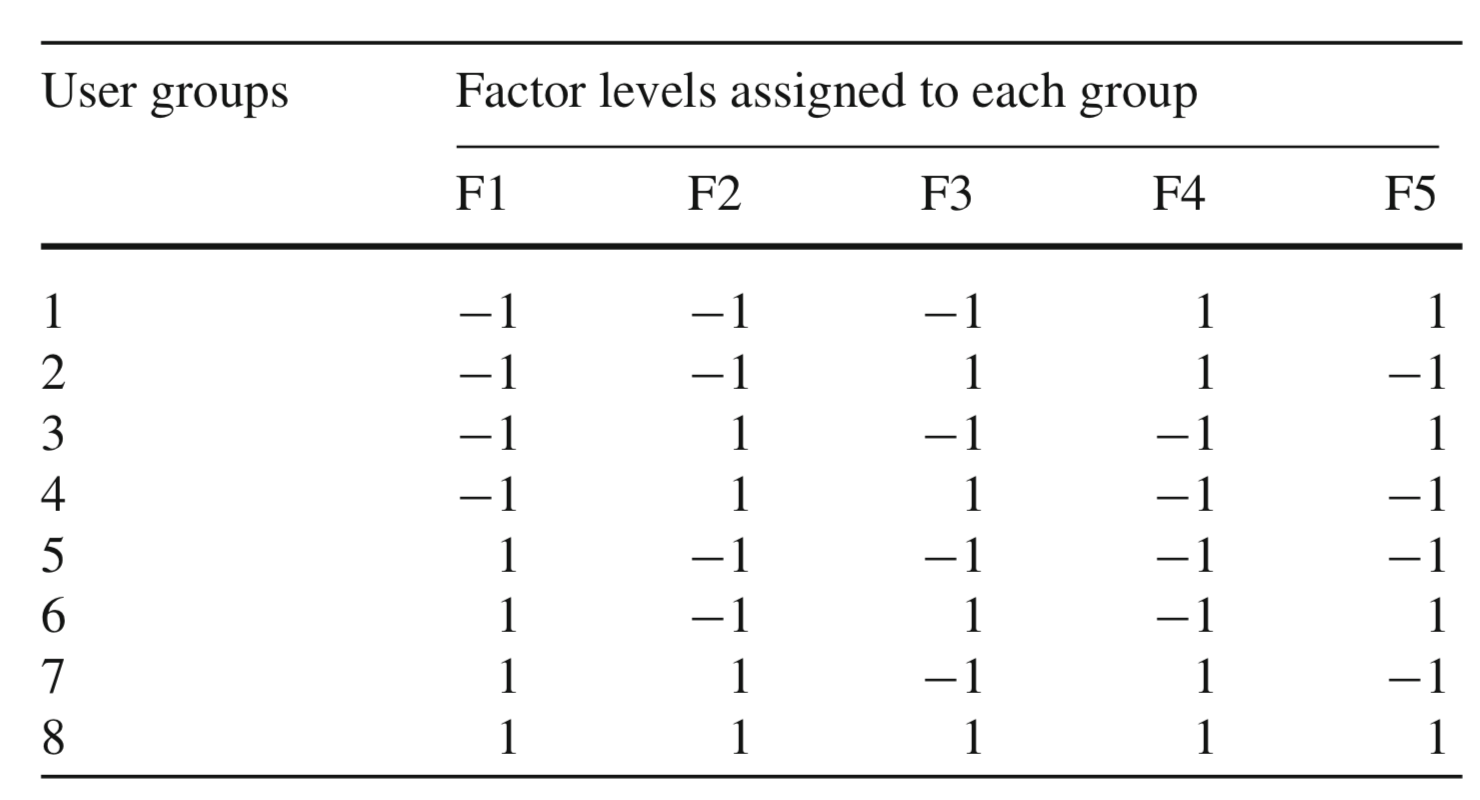


Каковы плюсы и минусы этого подхода?

### 3. Упрощение до тестирования одного улучшения

Способ 2 подходит только для ретроспективного тестирования для выявления общей тендеции зависимостей. В режиме реального времени о занимает много времени. Поэтому применяется такой подход:

`"Каждый вектор вариантов воспринимается как один вариант, после чего уже происходит оценка каждого варианта"`.

Какие плюсы и минусы у этого подхода?

## 3. Математическая постановка задачи многовариантного тестирования

Рассмотрим математическую постановку задачи 2.3 (тестирование одного улучшения)

В конце обсудим, как можно свести задачу к более общему случаю.

### Постановка задачи

Пусть имеются $k$ выборок размера $X_1$, $X_2$, $\dots$, $X_k$. Необходимо проверить гипотезу для средних значений этих выборок $\mu_k$:

$$
  H_0: \mu_1 = \mu_2 = \dots = \mu_k.
$$

против альтернативы:
$$
H_1: \exists i, j: \alpha_i \ne \alpha_j
$$

Для постановки задачи сложного тестирования необходимо еще учитывать дополнительные факторы взаимодействия между вариантами, поэтому это отходит в сторону многофакторного анализа (k-way ANOVA)

## 4. Решение задачи в случае Бернуллиевских случайных величин

Для бернуллиевских случайных величин можно свести задачу проверки критерия хи-квадрат при помощи таблиц сопряженности (тестирование множества распределений):

Для этого составим такую таблицу (оцениваем Bounce Rate): в строках напишем количество пользователей, которые ушли со страницы, а в столбцах располагаем различные варианты тестирования





|         | Original | Variation 3 | Variant 2 | Variant 4 | Variant 1 | Total |
|---------|----------|-------------|-----------|-----------|-----------|-------|
| Exit    | 844      | 1094        | 1016      | 1036      | 852       | 4842  |
| No Exit | 1259     | 1093        | 1050      | 1102      | 1122      | 5726  |
| Total   | 2103     | 2187        | 2166      | 2138      | 1974      | 10568 |

Критерий хи-квадрат проверяет, есть ли зависимость в значениях столбцов относительно значений в строках. Если такой зависимости нет, то столбцы имеют приблизительно похожее распределение.

In [ ]:
from __future__ import print_function, division
import scipy.stats
import numpy as np

In [ ]:
scipy.stats.chi2_contingency(np.array([
    [844, 1094, 1016, 1036, 852],
    [1259, 1093, 1050, 1102, 1122]
]))

Что можно сказать о выводах? (Второе значение - это p-value для критерия)

Какие есть предположения в возвращаемой таблице?

Таким же образом можно проводить A/B тест, только его лучше использовать не для двоичных исходов (есть клик/нет клика), а когда есть как минимум троичный вариант исхода: кнопка "лайка", "подписки" и "пролистать мимо" в случае соцсетей.

## 5.  Сведение Бернуллиевских случайных величин к нормальному распределению

Следующий раздел предполагается читать как трюк, который можно применять при крайне большом количестве элементов выборки в каждом случае (больше 1000), поскольку здесь будет применяться сразу два предположения:
* хорошее приближение с точки зрения ЦПТ
* границы применения критерия

Рассмотрим F-критерий Фишера для проверки равенства средних:

$$
  F = \frac{\sum_{j=1}^{k}n_j({\bar{X_j} - \bar{X}})^2}{\sum_{j=1}^{k}\sum_{i=1}^{n_j}(X_{ij} - \bar{X_{j}})^2} \cdot \frac{N - k}{k - 1}.
$$

<b>Загвоздка:</b> $X_{ij}$ должны быть нормальными.


<b>Наблюдение:</b> Среднее можно считать в несколько итераций: разбиваем выборку на группы равного размера, считаем в них среднее, а потом считаем среднее по группам.

Поэтому мы будем проверять уже не среднее бернуллиевских величин, а среднее по нормальным распределениям, которые являются таковыми после сделанной предобработки.

Посмотрим на среднее по каждой группе для бернуллиевских величин с вероятностью выпадения орла, равной $p_j$.

Тогда среднее по $m_j$ величинам, где $m_j \ge 50$, можно представить как величину из распределения $\mathcal{N}(p_j, \sqrt{p_j(1 - p_j) / m_j})$.

Для равенства дисперсий необходимо обеспечить факт, что дисперсии отличаются несильно.

Для этого необходимо убедиться, что $\sqrt{p_j(1 - p_j) / m_j}$ близки друг к другу.

Рассмотрим это на нашем примере с Bounce Rate.

In [ ]:
probabilities = np.array([0.4013, 0.5003, 0.4690, 0.4844, 0.4314])

In [ ]:
p_diff_p = ... # p(1 - p)

In [ ]:
p_diff_p

Соответственно, если брать в качестве $m_j$ числа, порядка 50, то какие значения надо брать для $m_j$?

In [ ]:
m = np.array([...])

In [ ]:
counts = np.array([2103, 2187, 2166, 2138, 1974])

In [ ]:
np.floor(counts / m)

In [ ]:
counts_n_j = np.floor(counts / m).astype(int)

Таким образом определяем количество $n_j$, которые можем использовать в наблюдении.

Осталось посчитать отклонения средних распределений $\sqrt{p_j(1 - p_j) / m_j}$ и запустить подсчет критерий уже для нормальных распределений.

In [ ]:
stds = ...

In [ ]:
samples = [scipy.stats.norm(loc=probabilities[i], scale=stds[i]).rvs(size=counts_n_j[i]) for i in range(5)]

In [ ]:
scipy.stats.f_oneway(*samples)

Какой вывод можно сделать из полученных результатов?

Для определения минимального размера выборки, необходимого для оценки метода, необходимо проделать следующие шаги:
  
* произвести шаг бинарного поиска в количестве необходимых элементов
* провести измерения
* если в текущем измерения достигла статистическая значимость, то уменьшить уровень, иначе увеличить

Аналогично можно замерить практические уровень значимости на данном количестве: запустить гипотезу много раз (с равными значениями средних), проверить, в каком проценте случаев p-value меньше необходимого уровня значимости $\alpha$. Если этот процент сравним с $\alpha$, то уменьшаем размер выборки, иначе - увеличиваем.

Попробуем провести этот эксперимент.

In [ ]:
np.mean(probabilities), stds

In [ ]:
stds

In [ ]:
def get_minimal_sample_size(mean, std, k_bins):
    left_sample_size = 1
    right_sample_size = 100
    
    while right_sample_size - left_sample_size > 1:
        mid_sample_size = (left_sample_size + right_sample_size) // 2
      
        # Testing 1000 times hypothesis of f_oneway
      
        count_bad = 0
      
        for i in range(1000):
            samples = [
                scipy.stats.norm(
                    loc=mean,
                    scale=std
                ).rvs(mid_sample_size)
                for j in range(k_bins)
            ]
        
            if scipy.stats.f_oneway(*samples).pvalue < 0.05:
                count_bad += 1
            
        ratio_bad = count_bad / 1000
        
        
        if ratio_bad > 0.05:
            left_sample_size = mid_sample_size
        else:
            right_sample_size = mid_sample_size
            
        print('Ratio bad: {}, bounds: {} - {}'.format(
            ratio_bad,
            left_sample_size,
            right_sample_size
        ))
             

In [ ]:
get_minimal_sample_size(mean=..., std=..., k_bins=5)

Посчитайте объем необходимой выборки для решения задачи многовариантного тестирования в данном случае.

## 6. Другие варианты проведения многовариантного тестирования

Предположим, что данные сложно поддаются такому анализу, который можно перевести в случай нормальных случайных величин (или есть мало траффика), или есть много различных вариантов исхода.

К примеру, рассмотрим данные, которые, скорее всего, принадлежат пуассоновскому распределению.

<div class="row">
  <div class="col col-md-4">
    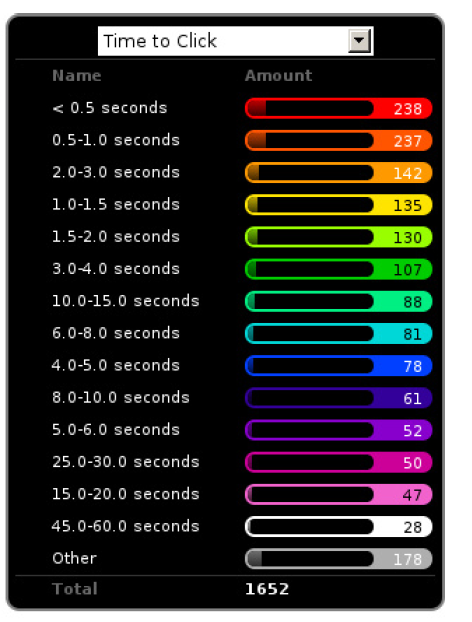
  </div>
  <div class="col col-md-4">
    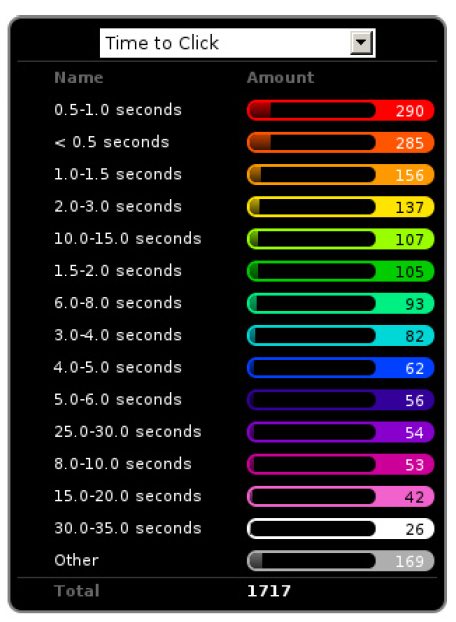
  </div>
</div>

Для примера обрежем этот случай в случае работы со временем клика, до трех секунд.

In [ ]:
first_data = [238, 237, 135, 130, 142]
second_data = [285, 290, 156, 105, 137]

Преобразуйте числовые данные таким образом, чтобы они были представлены в виде выборки.

In [ ]:
first_in_samples.shape, second_in_samples.shape

In [ ]:
scipy.stats.kruskal(first_in_samples, second_in_samples)

Тест проверяет на равенство медиан. Какие выводы можно получить из этого результата?

Проверим результаты в случае с нормальным приближением

In [ ]:
scipy.stats.kruskal(*samples)

Оправдан ли полученный результат?

## Appendix. Что делать с многофакторным анализом

Предположим, что есть некоторая задача классификации (необходимо определить качество товара по способу транспортировки) и есть желание проверить значимость квадратичных факторов (произведение двух фичей)

Тогда можно реализовать такую идею на задачу классификации (работает для конверсии)

1. Обучить модель логистической регрессии на данных.
2. Далее провести факторный анализ на полученных весах модели.

Более детальный план реализации показан в https://plot.ly/python/anova/


Для задачи про способ транспортировки:
* важен фактор скорости перемещения товара (при большой скорости могут произойти деформации объектов), но дано только расстояние
* время перемещения
* время, которое товар провел на складе (diffstart)
* время хранения товара (savetime)

А в итоге, метрику свежести товара можно определить как:

$$
  Freshness = 1 - diffstart / savetime - distance / movetime
$$

В итоге, для такой модели необходимо понимать, есть ли только зависимость между `diffstart`, `savetime`, `distance`, `movetime`, но и, действительно, есть ли завимость от скорости (совместного фактора времени и расстояния).



## Что умеем?

1. Ставить задачу многовариантного тестирования
2. Работать с задачей в случае дискретного конечного распределения.
3. Делать приближенный переход к нормальному распределению.
4. Считать минимальный размер выборки в нормальном приближении для множественного тестирования.
5. Проверять равенство медиан в случае дискретных распределений с множеством значений (работает и для непрерывного случая)

## Литература
1. https://plot.ly/python/anova/ - ANOVA in Python
2. https://link.springer.com/content/pdf/10.1007%2Fs10618-008-0114-1.pdf - статья про стратегии и методику проведения многовариантного тестирования.